# 1. Работа с таблицей

## 1.1. Чтение таблицы

In [1]:
import pandas as pd

In [2]:
column_names = ['seq', 'amk', 'TRBV', 'TRBJ']
df = pd.read_csv('~/homework/homework2/class_2/TRB_10_7/TRB_10_7_utf8.tsv', sep='\t', header=None, names=column_names)
df.head()

,seq,amk,TRBV,TRBJ
0,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,TRBV7-9,TRBJ1-2
1,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
2,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
3,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
4,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5


## 1.2. Построение графика

In [3]:
df['len'] = df['seq'].str.len()
df.head()

,seq,amk,TRBV,TRBJ,len
0,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,TRBV7-9,TRBJ1-2,39
1,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7,27
2,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1,36
3,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1,45
4,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5,63


In [4]:
import matplotlib.pyplot as plt

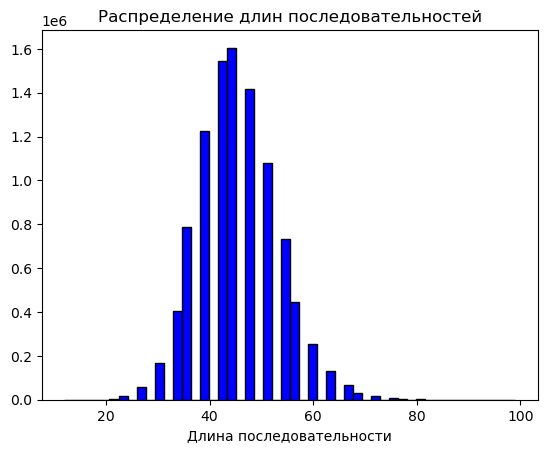

In [5]:
plt.hist(df['len'], bins=50, color='blue', edgecolor='black')
plt.xlabel("Длина последовательности")
plt.title("Распределение длин последовательностей")
plt.show()

# 2. Картинка

In [6]:
from IPython.display import Image, display
image = 'https://i.pinimg.com/originals/ae/73/ad/ae73ad4c9aa5210598ab9c78b2a5fae1.jpg'
display(Image(url=image))

# 3*. Перенос в R

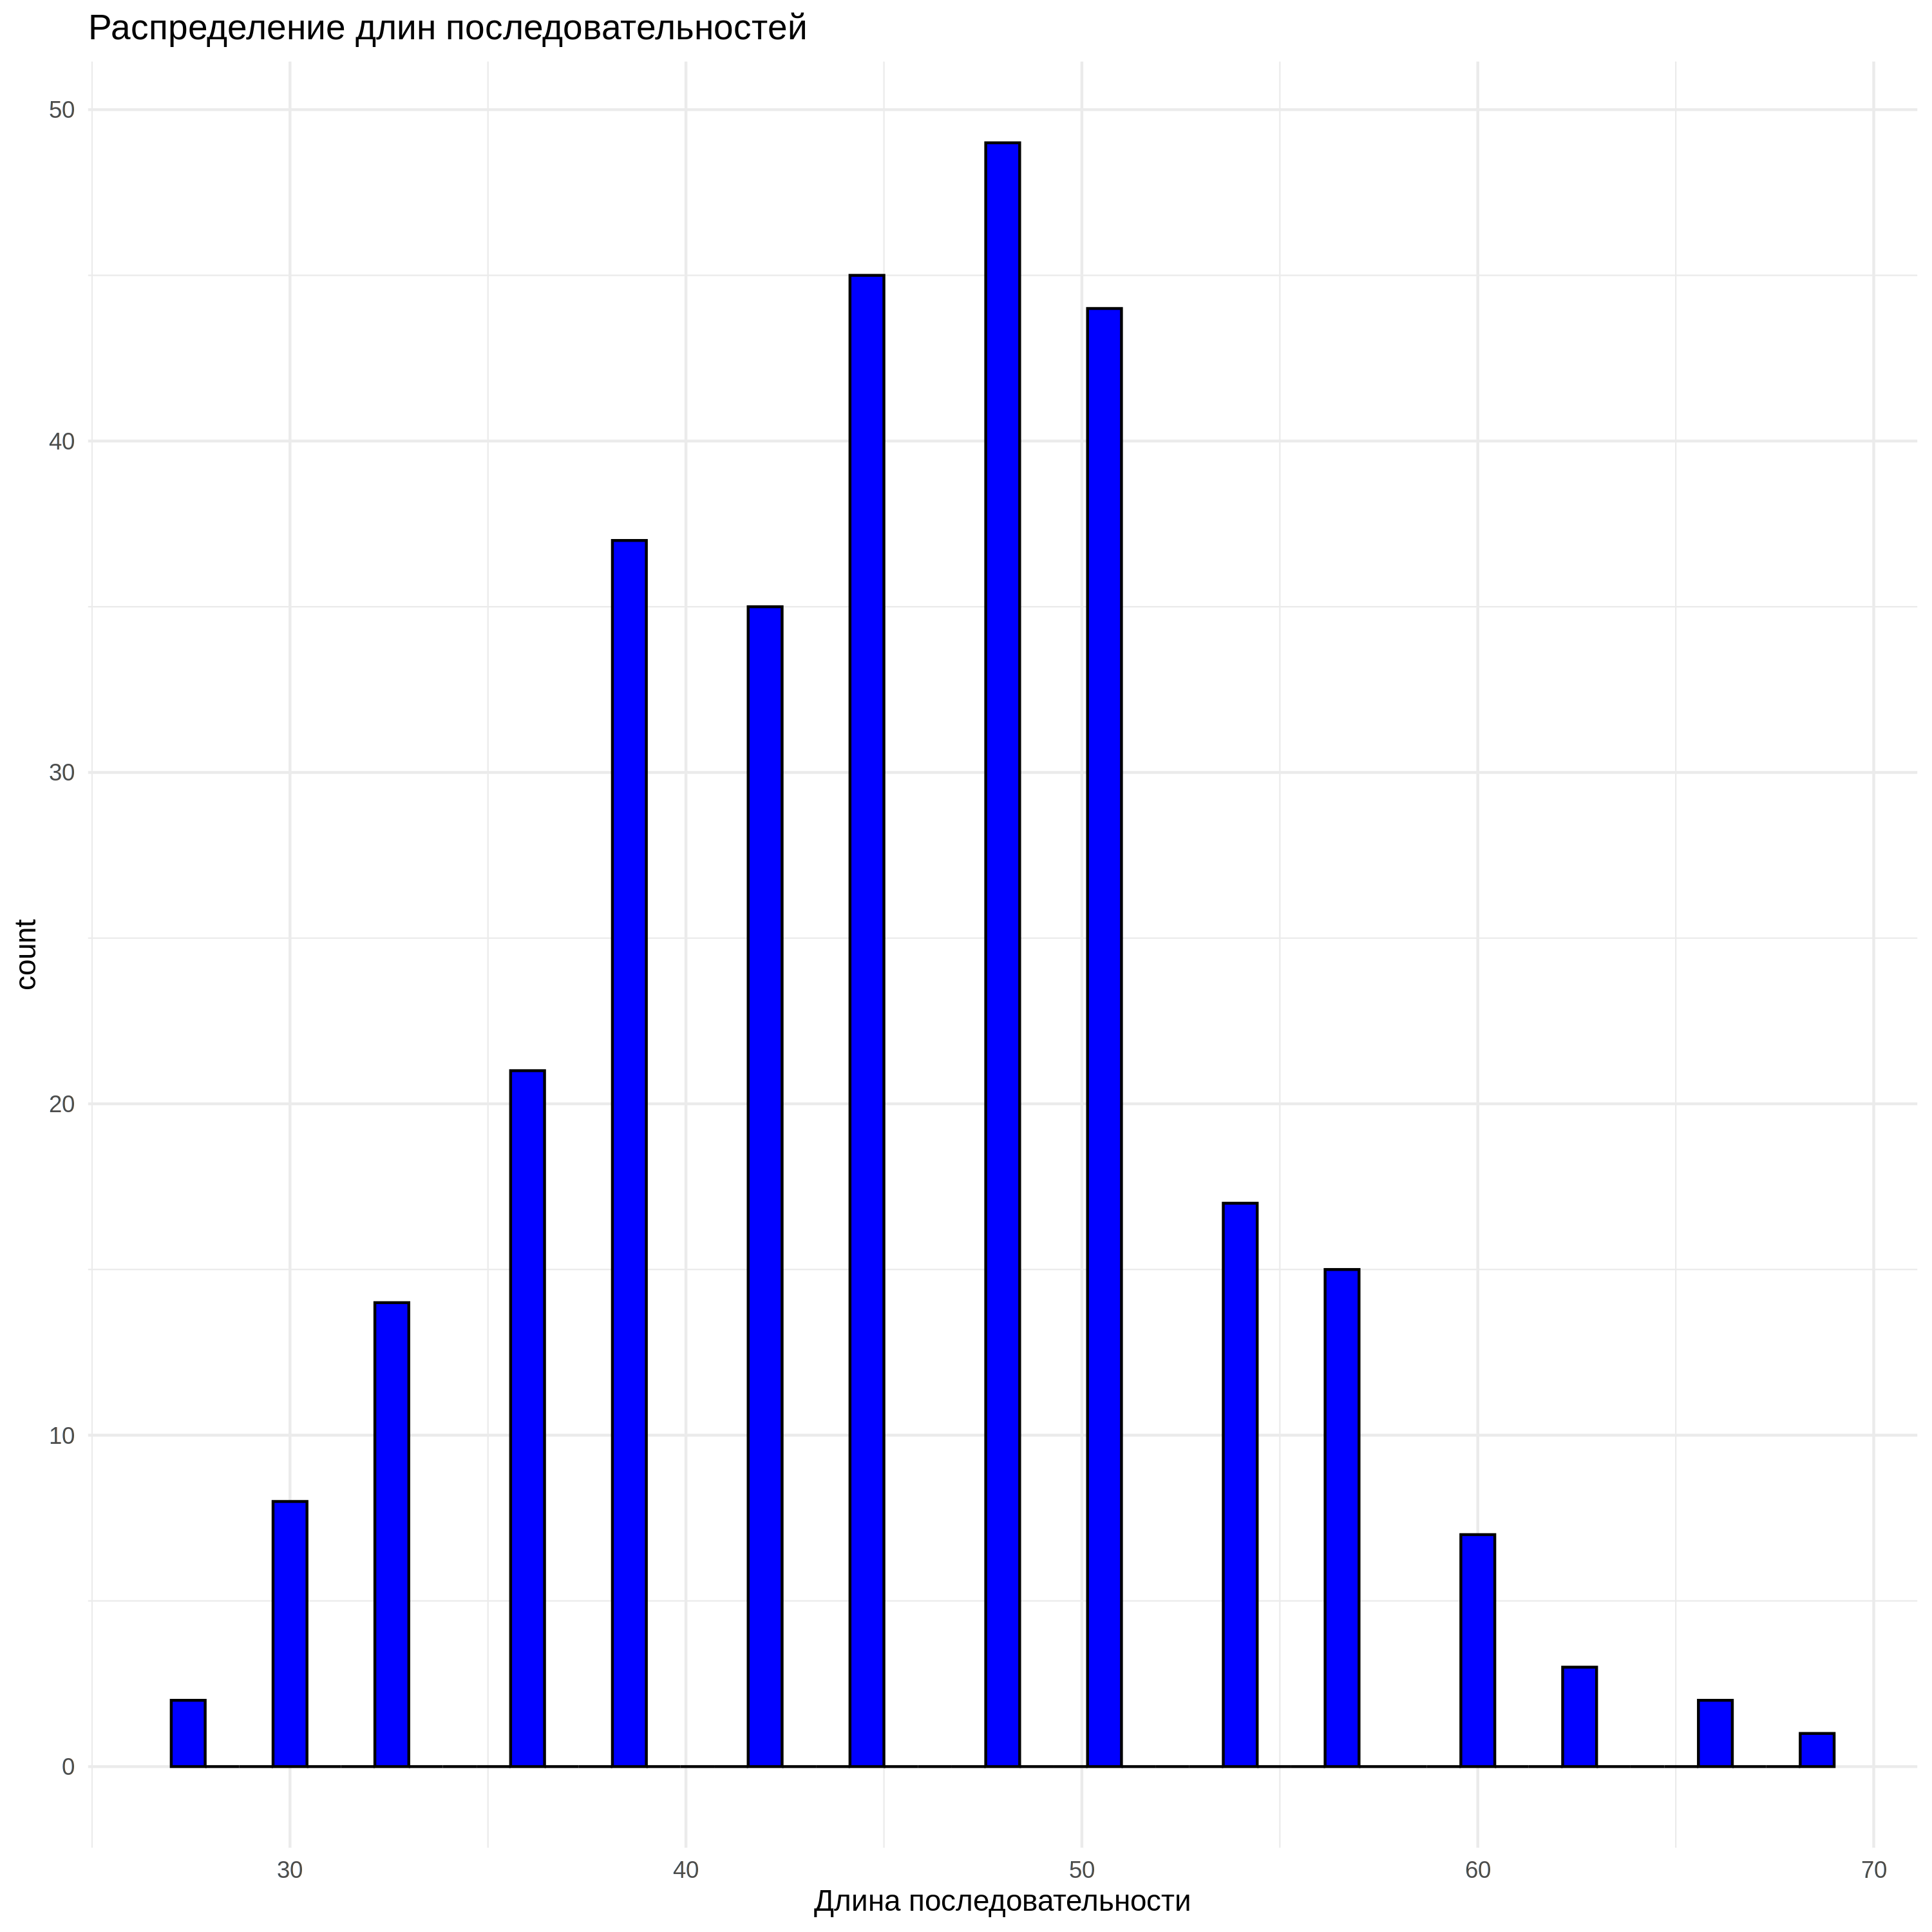

In [7]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2 import robjects
from rpy2.robjects import r

# Активация для конвертации
pandas2ri.activate()

# Переход из python в R
R_df = pandas2ri.py2rpy(df.head(300))

# Библиотека ggplot2
robjects.r('library(ggplot2)')


# Создаем функцию создания гистаграммы в R
robjects.r('''
    create_histogram <- function(data, x_column) {
    
        x_column_sym <- rlang::sym(x_column)

        p <- ggplot(data, aes(x = !!x_column_sym)) +
             geom_histogram(bins = 50, fill = "blue", color = "black") +
             labs(title = paste("Распределение длин последовательностей"),
                  x = "Длина последовательности") +
             theme_minimal() +
             theme(text = element_text(family = "Arial"))
        return(p)
    }
''')

create_histogram = robjects.r['create_histogram']
grafic = create_histogram(R_df, 'len')

robjects.globalenv['R_df'] = R_df

# Сохранение в файле
r.ggsave("grafic.png", plot=grafic, width=10, height=10)

Image(filename="grafic.png")